## Lab 7: Random Forest and Neural Network in P&C Predictive Analysis

In [1]:
###
# Created by: James Cheng
# Created for: Lab 7
# Created on: November 7th, 2024
print("world")

world


In [ ]:
import numpy as np


### Decision Tree

In [3]:
# install pandas
#%pip install pandas

import pandas as pd
import numpy as np

In [65]:
train = pd.read_csv("/Users/steven.z/Desktop/STATS 3AT3/lab7/train.csv") # read-in training dataset
validation = pd.read_csv("/Users/steven.z/Desktop/STATS 3AT3/lab7/validation.csv") # read-in validation dataset

In [66]:
train.columns # output columns of train set

Index(['Unnamed: 0', 'id_policy', 'year', 'pol_no_claims_discount',
       'pol_duration', 'pol_pay_freq', 'pol_payd', 'pol_usage', 'drv_sex1',
       'drv_age1', 'drv_age_lic1', 'drv_drv2', 'drv_sex2', 'drv_age2',
       'drv_age_lic2', 'vh_make_model', 'vh_age', 'vh_fuel', 'vh_type',
       'vh_speed', 'vh_value', 'vh_weight', 'population', 'town_surface_area',
       'claim_amount', 'random_value'],
      dtype='object')

In [67]:
### subset dataframe, trim it, delete unwanted columns
train = train.drop(["Unnamed: 0","random_value","id_policy"],axis=1)

In [68]:
### similarly subset validation set
validation = validation.drop(["Unnamed: 0","random_value","Severity_Estimate","Severity_Estimate_InvGau","id_policy"],axis=1)

---

In [69]:
# install sklearn
#%pip install scikit-learn

In [1]:
from sklearn import tree # use the tree function from sklearn library to fit decision tree
X_train = train.drop("claim_amount",axis=1) # drop response variable, here X is the feature matrix
y_train = train[["claim_amount"]] # y is our response
X_validation = validation.drop("claim_amount",axis=1)
y_validation = validation[["claim_amount"]]

ModuleNotFoundError: No module named 'sklearn'

In [71]:
### before doing regression in decision trees, we need to convert factor variable columns to factor data type
columns_to_convert = ["pol_payd","pol_usage","drv_sex1","drv_drv2","drv_sex2","vh_make_model","vh_fuel","vh_type","pol_pay_freq"]

In [72]:
### convert variables to one hot encoding
X_train = pd.get_dummies(X_train, columns=columns_to_convert, drop_first=True)
X_validation = pd.get_dummies(X_validation,columns=columns_to_convert,drop_first=True)

---

In [73]:
clf = tree.DecisionTreeRegressor() # default setting

In [74]:
# fit the decision tree
clf.fit(X_train,y_train)

DecisionTreeRegressor()

In [75]:
X_validation = X_validation.reindex(columns=X_train.columns, fill_value=0) # make sure that the validation set has the same column
# structure as the train set, if there is one column present in train set but not in validation set, it would be zero in the validation
# set

In [76]:
# predict using the model
decision_tree_prediction = clf.predict(X_validation)

In [77]:
# compute RMSE
RMSE_decision_tree = np.sqrt(np.mean((y_validation.values.flatten()-decision_tree_prediction)**2))
print("The RMSE produced by decision tree is: ",RMSE_decision_tree)

The RMSE produced by decision tree is:  1895.458772782274


In [88]:
#%pip install matplotlib
import matplotlib.pyplot as plt

### Bagging

In [79]:
from sklearn.ensemble import BaggingRegressor
bgg = BaggingRegressor(n_estimators=500,random_state=2024)

In [80]:
### fit the bagging model
bgg.fit(X_train,y_train.values.flatten())

BaggingRegressor(n_estimators=500, random_state=2024)

In [81]:
bagging_prediction = bgg.predict(X_validation)

In [82]:
# compute RMSE
RMSE_bagging = np.sqrt(np.mean((y_validation.values.flatten()-bagging_prediction)**2))
print("The RMSE produced by bagging is: ",RMSE_bagging)

The RMSE produced by bagging is:  1427.8897723044245


### Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators=500,criterion="squared_error",max_features="sqrt",random_state=2024)

In [84]:
ran.fit(X_train,y_train.values.flatten()) # fit the random forest model

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=2024)

In [85]:
ran_prediction = ran.predict(X_validation) # make predictions

In [86]:
# compute RMSE
RMSE_ran = np.sqrt(np.mean((y_validation.values.flatten()-ran_prediction)**2))
print("The RMSE produced by random forest is: ",RMSE_ran)

The RMSE produced by random forest is:  1332.1410364128747


Feature Importances:
              Feature  Importance
4        drv_age_lic1    0.073726
3            drv_age1    0.078667
2        pol_duration    0.079817
12  town_surface_area    0.100899
11         population    0.105410


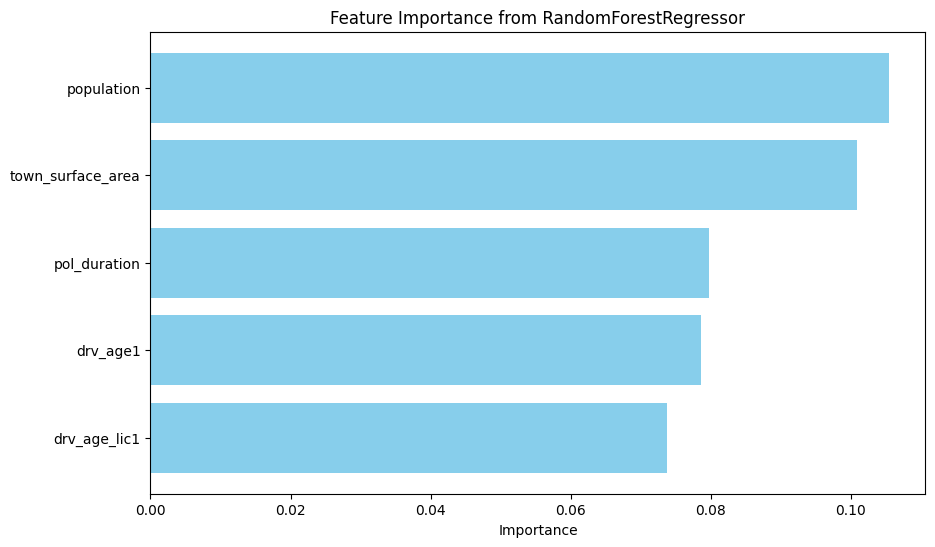

In [89]:
importances = ran.feature_importances_
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df = feature_importance_df.head()[::-1]

print("Feature Importances:")
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()

### Boosting

In [90]:
#%pip install xgboost
### let's fit xgboost
from xgboost import XGBRegressor, plot_importance

In [91]:
xgb = XGBRegressor(n_estimators=100,max_depth=1,learning_rate=0.5,random_state=2024)

In [92]:
xgb.fit(X_train,y_train.values.flatten())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=2024, ...)

In [93]:
# output prediction by XGBoost
xgb_prediction = xgb.predict(X_validation)

In [94]:
# compute RMSE
RMSE_xgb = np.sqrt(np.mean((y_validation.values.flatten()-xgb_prediction)**2))
print("The RMSE produced by random forest is: ",RMSE_xgb)

The RMSE produced by random forest is:  1319.4281519054996


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

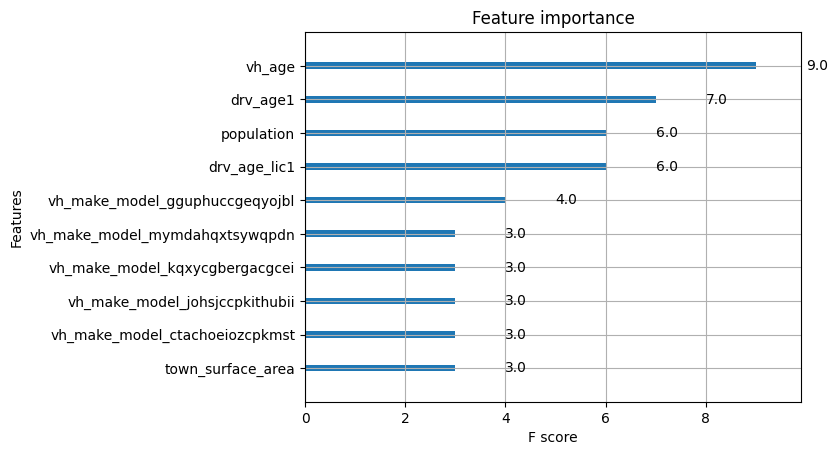

In [95]:
### plot variable importance
plot_importance(xgb,importance_type="weight",max_num_features=10)
### f -score is the number of times such variable has appeared in the splits

#### Reminder
Both of our GLM Gamma and InverseGaussian produced a RMSE of ~1300

### Neural Network

Our task is again to predict claim amount of each insured. We will be using the same training set to built our model and the same validation set above to evaluate model performance with metric RMSE.

In [21]:
import pandas as pd

train = pd.read_csv("/Users/steven.z/Desktop/STATS 3AT3/lab7/train.csv") # read-in training dataset
validation = pd.read_csv("/Users/steven.z/Desktop/STATS 3AT3/lab7/validation.csv") # read-in validation dataset

### subset dataframe, trim it, delete unwanted columns
train = train.drop(["Unnamed: 0","random_value","id_policy"],axis=1)
### similarly subset validation set
validation = validation.drop(["Unnamed: 0","random_value","Severity_Estimate","Severity_Estimate_InvGau","id_policy"],axis=1)

X_train = train.drop("claim_amount",axis=1) # drop response variable, here X is the feature matrix
y_train = train[["claim_amount"]] # y is our response
X_validation = validation.drop("claim_amount",axis=1)
y_validation = validation[["claim_amount"]]

Before we model using NN, we need to find a way to handle NA values which are missing values.

In [24]:
### to see which columns contain NaN values or NA values, we could
X_train.isna().any()

year                      False
pol_no_claims_discount    False
pol_duration              False
pol_pay_freq              False
pol_payd                  False
pol_usage                 False
drv_sex1                  False
drv_age1                  False
drv_age_lic1              False
drv_drv2                  False
drv_sex2                  False
drv_age2                   True
drv_age_lic2               True
vh_make_model             False
vh_age                    False
vh_fuel                   False
vh_type                   False
vh_speed                   True
vh_value                   True
vh_weight                  True
population                False
town_surface_area         False
dtype: bool

In [44]:
# to find how many rows of each column feature are NaN
X_train.isna().sum()

year                      0
pol_no_claims_discount    0
pol_duration              0
pol_pay_freq              0
pol_payd                  0
pol_usage                 0
drv_sex1                  0
drv_age1                  0
drv_age_lic1              0
drv_drv2                  0
drv_sex2                  0
drv_age2                  0
drv_age_lic2              0
vh_make_model             0
vh_age                    0
vh_fuel                   0
vh_type                   0
vh_speed                  0
vh_value                  0
vh_weight                 0
population                0
town_surface_area         0
dtype: int64

In [42]:
### we see from above that drv_age2, drv_age_lic2, vh_speed, vh_value, vh_weight contain missing values
### since these are all continuous variables, we can simply fill in
NaN_column = ["drv_age2","drv_age_lic2","vh_speed","vh_value","vh_weight"]

In [43]:
### extract the mean value of each column and replace NaN value with mean value
for i in NaN_column:

    # extract mean value of each column
    avg_val = X_train[[i]].mean()

    # fill na in specific column with its mean
    X_train[[i]] = X_train[[i]].fillna(avg_val)

    # do the same for validation set
    X_validation[[i]] = X_validation[[i]].fillna(avg_val)

In [45]:
### before doing regression in decision trees, we need to convert factor variable columns to factor data type
columns_to_convert = ["pol_payd","pol_usage","drv_sex1","drv_drv2","drv_sex2","vh_make_model","vh_fuel","vh_type","pol_pay_freq"]

In [46]:
### convert variables to one hot encoding
X_train = pd.get_dummies(X_train, columns=columns_to_convert, drop_first=True)
X_validation = pd.get_dummies(X_validation,columns=columns_to_convert,drop_first=True)

In [47]:
X_validation = X_validation.reindex(columns=X_train.columns, fill_value=0) # make sure that the validation set has the same column
# structure as the train set, if there is one column present in train set but not in validation set, it would be zero in the validation
# set

---

In [53]:
### let's write a function to compute RMSE
def rmse_compute(prediction):
    rmse = np.sqrt(np.mean((y_validation.values.flatten()-prediction)**2))
    print("The RMSE produced by the model is: ",rmse)
    return(rmse)

---

#### Single layer NN
see here: https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.predict

In [1]:
from sklearn.neural_network import MLPRegressor

In [48]:
# single (hidden) layer neural network with 20 hidden units
# use relu function as the activation, other parameters as default
single_layer = MLPRegressor(hidden_layer_sizes=(20),activation='relu',random_state=2024)

In [50]:
single_layer.fit(X_train,y_train.values.flatten())

MLPRegressor(hidden_layer_sizes=20, random_state=2024)

In [51]:
### make predictions
single_layer_predictions = single_layer.predict(X=X_validation)

In [58]:
### calculate RMSE
rmse_single_layer_nn = rmse_compute(single_layer_predictions)

The RMSE produced by the model is:  1304.6351940805794


#### Two layers NN

In [59]:
two_layer = MLPRegressor(hidden_layer_sizes=(20,10),activation='relu',random_state=2024)

In [60]:
two_layer.fit(X_train,y_train.values.flatten())

MLPRegressor(hidden_layer_sizes=(20, 10), random_state=2024)

In [61]:
two_layer_predictions = two_layer.predict(X_validation)

In [62]:
### calculate RMSE
rmse_two_layer_nn = rmse_compute(two_layer_predictions)

The RMSE produced by the model is:  1319.2922285336892


In [104]:
rmse_results = pd.DataFrame({"Models":["Decision Tree","Bagging","Boosting","Random Forest","Single Layer NN","Two Layers NN"],
"RMSE":[RMSE_decision_tree,RMSE_bagging,RMSE_xgb,RMSE_ran,rmse_single_layer_nn,rmse_two_layer_nn]})
rmse_results.sort_values(by="RMSE",ascending=True)

,Models,RMSE
4,Single Layer NN,1304.635194
5,Two Layers NN,1319.292229
2,Boosting,1319.428152
3,Random Forest,1332.141036
1,Bagging,1427.889772
0,Decision Tree,1895.458773
